# Python for Data Science, Level I
### *Session \#9*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Pandas and Matplotlib Review

### Warm Ups

---

**Import pandas/matplotlib, set style, and create dataframe:**

Note: Info about what the data in each column means is available [here](https://www.kaggle.com/c/titanic/data)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel') 
titanic_df = pd.read_csv("titanic.csv")

**Grab column from dataframe:** `titanic_df['embark_town']`

**Boolean indexing:**: `is_adult_female = (titanic_df['age'] > 18) & (titanic_df['sex'] == 'female')`

**Creating a new column**: `titanic_df['adult_female'] = is_adult_female`

**Subset of columns as new dataframe:** `survival_df = titanic_df[['who', 'survived']]`

**Use a group by:** `survival_count_df = survival_df.groupby('who').sum()`

**Plot the data:** 
```python
survival_axes = survival_count_df.plot(kind='bar')
survival_fig = plt.gcf()
```


### Exercises
---

**1. Create a new Boolean column** `is_senior` **which is** `True` **if the passenger is over the age of 60 and** `False` **otherwise**

In [3]:
titanic_df['is_senior'] = titanic_df['age'] > 60

**2. Use Boolean indexing to select the passengers who are seniors. What was the survival rate among seniors?**

Hint: Use the total count of rows, along with the sum of the 'survived' column.

In [6]:
seniors = titanic_df[titanic_df['is_senior']]

seniors['survived'].sum()/len(seniors)

0.22727272727272727

**3. What was the survival rate among people who were NOT seniors?**

Hint: You can use the `~` operator to reverse a Boolean filter.

In [7]:
not_seniors = titanic_df[~titanic_df['is_senior']]

not_seniors['survived'].sum()/len(not_seniors)

0.3878020713463751

**4. Create a dataframe** `class_df` **by grabbing just the columns** `class` **and** `survived`

In [8]:
class_df = titanic_df[['class', 'survived']]

**5. Use a groupby on** `class_df` **to sum up the number of survivors by class**

In [9]:
class_df.groupby("class").sum()

,survived
class,
First,136
Second,87
Third,119


### Extra Credit
---

**1. When performing a groupby, you can use** `.agg()` **instead of the normal Numpy methods like** `.sum()` **or** `.mean()`

**If you use** `.agg()`**, you can apply multiple aggregators at once by giving a list of their names, eg:** `df.groupby('sex').agg(['sum', 'count'])` 

**Do a groupby on** `class_df` **to find the** `count` **and** `sum` **of the survived column (ie. total number and survivors)**  

In [14]:
survival_df = class_df.groupby('class').agg(['sum', 'count'])

**2. Plot the resulting dataframe from the last problem as a bar chart**

Note: You can use `.legend()` on the resulting axes to make your labels clearer. Pass the list of names you want for each color.

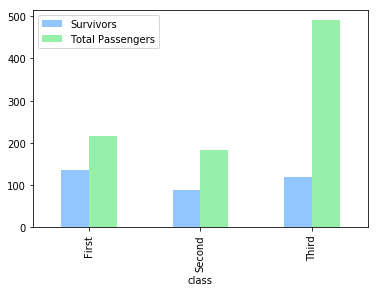

In [15]:
axes = survival_df.plot(kind='bar')
axes.legend(['Survivors', 'Total Passengers'])

## II. Intro to Pivot Tables

### Warm Ups
---

**Basic pivot table:** `pivot_df = titanic_df.pivot_table('survived', index='who')`

Note: `pivot_table()` will use the average when combining rows, by default.

**Grab by row index:** `pivot_df.loc['man']`

**Pivot table using different aggregator:** `titanic_df.pivot_table('survived', index='embark_town', aggfunc='sum')`

**Pivot table with totals** `titanic_df.pivot_table('survived', index='who', margins=True)`

**Pivot table divided out by column values**: `column_df = titanic_df.pivot_table('survived', index='who', columns='class')`

**Grab by row and column index:** `column_df.loc['child', 'Second']`

### Exercises
---

**1. Create a pivot table to show survival rates based on where passengers embarked from.**
   

In [19]:
# Pivot table defaults to mean, which will give survival rate 
# because 'survived' is a column of 1s and 0s

table = titanic_df.pivot_table('survived', index='embark_town')

**2. What was the survival rate for passengers from Cherbourg? Southampton?**

In [25]:
print(f"Survival from Cherbourg: {table.loc['Cherbourg', 'survived']}")
print(f"Survival from Southampton: {table.loc['Southampton', 'survived']}")

Survival from Cherbourg: 0.5535714285714286
Survival from Southampton: 0.33695652173913043


**3. Create a pivot table the shows a total count of passengers from each** `embark_town`

In [27]:
titanic_df.pivot_table('survived', index='embark_town', aggfunc='count')

,survived
embark_town,
Cherbourg,168
Queenstown,77
Southampton,644


**4.  Let's figure out the ticket prices! Create a pivot table for** `fare`, **with index broken down by class and columns broken down by the column** `who` 

In [29]:
tickets = titanic_df.pivot_table('fare', index='class', columns='who')

**5. What was the average price for a woman in first class? What about a man in second class?** 

In [35]:
print(f"Avg first-class woman's ticket: ${round(tickets.loc['First', 'woman'], 2)}")
print(f"Avg second-class man's ticket: ${round(tickets.loc['Second', 'man'], 2)}")

Avg first-class woman's ticket: $104.32
Avg second-class man's ticket: $19.05


## Extra Credit
---

**1. Plot the dataframe for ticket prices as a bar chart.**

Note: You should only need to specify .plot(kind="bar")

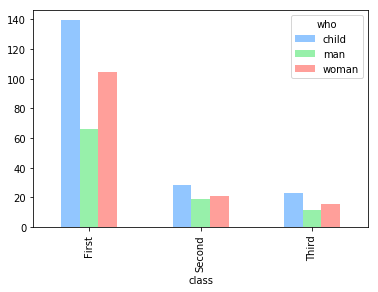

In [36]:
tickets.plot(kind='bar')

## III. Advanced Pivot Tables

### Warm Ups
---

**Cut a continuous column into bins by INTERVAL:** 
```python
age_bins = pd.cut(titanic_df['age'], [0, 18, 80])
titanic_df.pivot_table("survived", index=age_bins, columns="class")
```

Note: If you use `age_bins` as index/columns, need to supply labels e.g. `lables=['child', 'adult']` also. Indexes/column names cannot be interval values like (0, 18)

**Cut a column into three evenly DISTRIBUTED bins:** 
```python
even_bins = pd.qcut(titanic_df['age'], 3)
titanic_df.pivot_table("survived", index=even_bins, columns="class")
```

Note: If you use `even_bins` as index/columns, need to supply labels e.g. `lables=['child', 'adult']` also. Indexes/column names cannot be interval values like (0, 18)

**Create a dataframe with heiarchical index:** `multi_df = titanic_df.pivot_table("survived", index=["embark_town", "who"], columns="class")`

**Grab value with heirarchical index:** `multi_df.loc[('Cherbourg', 'man'), 'First']`

### Exercises
---

**1. Create a pivot table for survival rate that indexes age by** `child`, `teenager`, `adult` **and** `senior`

Hint: First use pd.cut() to break the `age` column into four bins divided at 13, 18, and 60.

In [42]:
ages = pd.cut(titanic_df["age"], [0, 13, 18, 60, 200], labels=["child", "teenager", "adult", "senior"])

titanic_df.pivot_table("survived", index=ages)

,survived
age,
child,0.591549
teenager,0.411765
adult,0.388788
senior,0.227273


**2. Create a new pivot table for survival rate that indexes by** `child`, `teenager`, `etc` **but also by** `sex`. **The columns should break survival rate by** `class`

In [47]:
multi_df = titanic_df.pivot_table("survived", index=[ages, 'sex'], columns='class')
multi_df

class               First    Second     Third
age      sex                                 
child    female  0.000000  1.000000  0.500000
         male    1.000000  1.000000  0.360000
teenager female  1.000000  1.000000  0.526316
         male    0.500000  0.000000  0.076923
adult    female  0.972222  0.900000  0.413793
         male    0.416667  0.061728  0.136364
senior   female  1.000000       NaN  1.000000
         male    0.083333  0.333333  0.000000

**3. What was the survival rate for teenage men in First class?**

In [48]:
multi_df.loc[("teenager", "male"), "First"]

0.5